## Create Models: Logistic Regression and Support Vector Machines(DJ)
### Pradeep, Kevin, Sangrae, DJ

### Importing the libraries needed for the project 

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.model_selection import ShuffleSplit
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import datetime
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import make_scorer
#from sklearn.grid_search import GridSearchCV
from sklearn.feature_selection import VarianceThreshold, RFE, SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier, AdaBoostClassifier


### Loading the dataset

In [2]:
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None) # display all columns


In [3]:
categoricals = ['CRASH_DATE_EST_I', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
                'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'TRAFFICWAY_TYPE',
                'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ROADWAY_SURFACE_COND',
                'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
                'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE',
                'SEC_CONTRIBUTORY_CAUSE', 'STREET_DIRECTION', 'STREET_NAME', 'PHOTOS_TAKEN_I',
                'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I',
                'MOST_SEVERE_INJURY', 'BEAT_OF_OCCURRENCE']
dtypes = dict.fromkeys(categoricals, 'category')

In [4]:
df = pd.read_csv("data/TrafficCrashesChicago.csv", parse_dates = ['CRASH_DATE', 'DATE_POLICE_NOTIFIED'],
                dtype=dtypes)
#data.set_index('CRASH_TYPE', inplace=True)

### Quick look at the data 

#### The inital dimension of the dataset:

In [5]:
df.shape

(377630, 48)

In [6]:
df.head(5)

,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,JC334993,NaN,2019-07-04 22:33:00,45,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",2019-07-04 23:05:00,FOLLOWING TOO CLOSELY,NOT APPLICABLE,300,N,LAKE SHORE DR SB,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,5,7,41.886140,-87.614274,POINT (-87.614274106164 41.8861404879)
1,JC370822,NaN,2019-07-30 10:22:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",2019-07-30 10:25:00,FAILING TO YIELD RIGHT-OF-WAY,IMPROPER TURNING/NO SIGNAL,8201,S,DR MARTIN LUTHER KING JR DR,631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3,7,41.745549,-87.614670,POINT (-87.614669906271 41.745549113377)
2,JC387098,NaN,2019-08-10 17:00:00,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",2019-08-10 17:35:00,EQUIPMENT - VEHICLE CONDITION,NOT APPLICABLE,6747,S,CREGIER AVE,332,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,7,8,41.772004,-87.581234,POINT (-87.58123401629 41.772004323752)
3,JC395195,NaN,2019-08-16 16:53:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"$501 - $1,500",2019-08-16 16:53:00,UNABLE TO DETERMINE,NOT APPLICABLE,554,N,FRANKLIN ST,1831,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16,6,8,41.892327,-87.635742,POINT (-87.635741843096 41.89232650689)
4,JC396604,NaN,2019-08-17 16:04:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"$501 - $1,500",2019-08-17 18:30:00,UNABLE TO DETERMINE,UNABLE TO DETERMINE,3700,N,WESTERN AVE,1921,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16,7,8,41.948637,-87.688458,POINT (-87.688457506457 41.948636883802)


#### Checking the useablity of variables

In [7]:
row, column = df.shape
df1 = round(((row - df.isnull().sum())/ row) * 100)
df1

RD_NO                            100.0
CRASH_DATE_EST_I                   7.0
CRASH_DATE                       100.0
POSTED_SPEED_LIMIT               100.0
TRAFFIC_CONTROL_DEVICE           100.0
DEVICE_CONDITION                 100.0
WEATHER_CONDITION                100.0
LIGHTING_CONDITION               100.0
FIRST_CRASH_TYPE                 100.0
TRAFFICWAY_TYPE                  100.0
LANE_CNT                          53.0
ALIGNMENT                        100.0
ROADWAY_SURFACE_COND             100.0
ROAD_DEFECT                      100.0
REPORT_TYPE                       98.0
CRASH_TYPE                       100.0
INTERSECTION_RELATED_I            22.0
NOT_RIGHT_OF_WAY_I                 5.0
HIT_AND_RUN_I                     28.0
DAMAGE                           100.0
DATE_POLICE_NOTIFIED             100.0
PRIM_CONTRIBUTORY_CAUSE          100.0
SEC_CONTRIBUTORY_CAUSE           100.0
STREET_NO                        100.0
STREET_DIRECTION                 100.0
STREET_NAME              

##### Checking the duplicates

In [8]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
377625    False
377626    False
377627    False
377628    False
377629    False
Length: 377630, dtype: bool

In [9]:
df['STREET_NAME'].value_counts()

WESTERN AVE              10320
PULASKI RD                8988
CICERO AVE                8165
ASHLAND AVE               8118
HALSTED ST                7136
                         ...  
LAKE SHORE                   1
LA SALLE DR /ILLINOIS        1
OTSEGO AVE                   1
BALDWIN AVE                  1
ST MARY ST                   1
Name: STREET_NAME, Length: 1536, dtype: int64

In [10]:
df['BEAT_OF_OCCURRENCE'].value_counts()  

1834    5546
114     4472
122     4442
1831    4430
813     3829
        ... 
1125     348
422      330
1653     138
1655      59
1652      56
Name: BEAT_OF_OCCURRENCE, Length: 274, dtype: int64

#### Lets look at the date length of the data set

In [11]:
df.CRASH_DATE.iloc[[1,-1]]

1        2019-07-30 10:22:00
377629   2019-08-20 17:14:00
Name: CRASH_DATE, dtype: datetime64[ns]

### Below are the attributes in the data set and the type

#### Data types

In [12]:
df.dtypes

RD_NO                                    object
CRASH_DATE_EST_I                       category
CRASH_DATE                       datetime64[ns]
POSTED_SPEED_LIMIT                        int64
TRAFFIC_CONTROL_DEVICE                 category
DEVICE_CONDITION                       category
WEATHER_CONDITION                      category
LIGHTING_CONDITION                     category
FIRST_CRASH_TYPE                       category
TRAFFICWAY_TYPE                        category
LANE_CNT                                float64
ALIGNMENT                                object
ROADWAY_SURFACE_COND                   category
ROAD_DEFECT                            category
REPORT_TYPE                            category
CRASH_TYPE                             category
INTERSECTION_RELATED_I                 category
NOT_RIGHT_OF_WAY_I                     category
HIT_AND_RUN_I                          category
DAMAGE                                 category
DATE_POLICE_NOTIFIED             datetim

#### Data attributes(Colmns)

In [13]:
list(df)

['RD_NO',
 'CRASH_DATE_EST_I',
 'CRASH_DATE',
 'POSTED_SPEED_LIMIT',
 'TRAFFIC_CONTROL_DEVICE',
 'DEVICE_CONDITION',
 'WEATHER_CONDITION',
 'LIGHTING_CONDITION',
 'FIRST_CRASH_TYPE',
 'TRAFFICWAY_TYPE',
 'LANE_CNT',
 'ALIGNMENT',
 'ROADWAY_SURFACE_COND',
 'ROAD_DEFECT',
 'REPORT_TYPE',
 'CRASH_TYPE',
 'INTERSECTION_RELATED_I',
 'NOT_RIGHT_OF_WAY_I',
 'HIT_AND_RUN_I',
 'DAMAGE',
 'DATE_POLICE_NOTIFIED',
 'PRIM_CONTRIBUTORY_CAUSE',
 'SEC_CONTRIBUTORY_CAUSE',
 'STREET_NO',
 'STREET_DIRECTION',
 'STREET_NAME',
 'BEAT_OF_OCCURRENCE',
 'PHOTOS_TAKEN_I',
 'STATEMENTS_TAKEN_I',
 'DOORING_I',
 'WORK_ZONE_I',
 'WORK_ZONE_TYPE',
 'WORKERS_PRESENT_I',
 'NUM_UNITS',
 'MOST_SEVERE_INJURY',
 'INJURIES_TOTAL',
 'INJURIES_FATAL',
 'INJURIES_INCAPACITATING',
 'INJURIES_NON_INCAPACITATING',
 'INJURIES_REPORTED_NOT_EVIDENT',
 'INJURIES_NO_INDICATION',
 'INJURIES_UNKNOWN',
 'CRASH_HOUR',
 'CRASH_DAY_OF_WEEK',
 'CRASH_MONTH',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION']

### Looking at the Numerical and Object variables(Columns) of the raw data set

#### Descriptive statistics within the data set (Numerical)

In [14]:
df.describe(include=['number'])

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,377630.000000,1.985490e+05,377630.000000,376172.000000,375403.000000,375403.000000,375403.00000,375403.000000,375403.000000,375403.000000,375403.0,377630.000000,377630.000000,377630.000000,375627.000000,375627.000000
mean,28.244758,1.335580e+01,3580.168864,2.020719,0.163496,0.000882,0.01773,0.089070,0.055815,2.025890,0.0,13.180062,4.121158,6.909215,41.858157,-87.671980
std,6.662733,2.965030e+03,2906.301644,0.416721,0.523002,0.032261,0.15566,0.383158,0.301246,1.160255,0.0,5.455058,1.965998,3.454893,0.358471,0.731744
min,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.934014
25%,30.000000,2.000000e+00,1199.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.788098,-87.720411
50%,30.000000,2.000000e+00,3100.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.878217,-87.672417
75%,30.000000,4.000000e+00,5500.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.924989,-87.632837
max,99.000000,1.191625e+06,451100.000000,18.000000,21.000000,3.000000,7.00000,21.000000,10.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


#### Descriptive statistics within the data set (Numerical)

In [15]:
df.describe(include=['category'])

,CRASH_DATE_EST_I,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,MOST_SEVERE_INJURY
count,28062,377630,377630,377630,377630,377630,377630,377630,377630,368884,377630,83409,17401,104899,377630,377630,377630,377628,377629,377626,4781,7624,1264,2646,2100,617,375396
unique,2,19,8,11,6,18,20,7,7,2,2,2,2,2,3,40,40,4,1536,274,2,2,2,2,4,2,5
top,Y,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,DRY,NO DEFECTS,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,Y,Y,Y,"OVER $1,500",UNABLE TO DETERMINE,NOT APPLICABLE,W,WESTERN AVE,1834,Y,Y,Y,Y,CONSTRUCTION,Y,NO INDICATION OF INJURY
freq,24356,217363,219376,298351,247573,93358,171443,282400,314890,229370,291294,79491,15902,100355,212956,136519,150493,134826,10320,5546,3729,6200,864,2100,1499,554,329936


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377630 entries, 0 to 377629
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   RD_NO                          377630 non-null  object        
 1   CRASH_DATE_EST_I               28062 non-null   category      
 2   CRASH_DATE                     377630 non-null  datetime64[ns]
 3   POSTED_SPEED_LIMIT             377630 non-null  int64         
 4   TRAFFIC_CONTROL_DEVICE         377630 non-null  category      
 5   DEVICE_CONDITION               377630 non-null  category      
 6   WEATHER_CONDITION              377630 non-null  category      
 7   LIGHTING_CONDITION             377630 non-null  category      
 8   FIRST_CRASH_TYPE               377630 non-null  category      
 9   TRAFFICWAY_TYPE                377630 non-null  category      
 10  LANE_CNT                       198549 non-null  float64       
 11  

### Reported Vehicle Accidents from 2013 to 2020

In [17]:
fatal = df['INJURIES_FATAL'].sum()
incapacitating= df['INJURIES_INCAPACITATING'].sum()
non_incapacitating = df['INJURIES_NON_INCAPACITATING'].sum()
rnev = df['INJURIES_REPORTED_NOT_EVIDENT'].sum()
nind = df['INJURIES_NO_INDICATION'].sum()
unknown = df['INJURIES_UNKNOWN'].sum()


In [18]:
df = df.set_index('CRASH_DATE').sort_index()
start_date, end_date = df.index[1], df.index[-1]
print("The total death in car crash accidents since the year {}, up to {} is {}.".format(start_date, end_date,fatal))
print("The total number of incapacitating and non-incapacitating injuries are  {}, {} respectively".format(incapacitating,non_incapacitating))
print("The total number of repoted not evident and no indication injuries are  {}, {} respectively".format(rnev,nind))
print("The total number of unknown injuries are  {}".format(unknown))

The total death in car crash accidents since the year 2014-01-18 18:14:00, up to 2020-01-17 00:30:00 is 331.0.
The total number of incapacitating and non-incapacitating injuries are  6656.0, 33437.0 respectively
The total number of repoted not evident and no indication injuries are  20953.0, 760525.0 respectively
The total number of unknown injuries are  0.0


## Visualizing the data

#### Traffic crash types by the year( Bar charts)

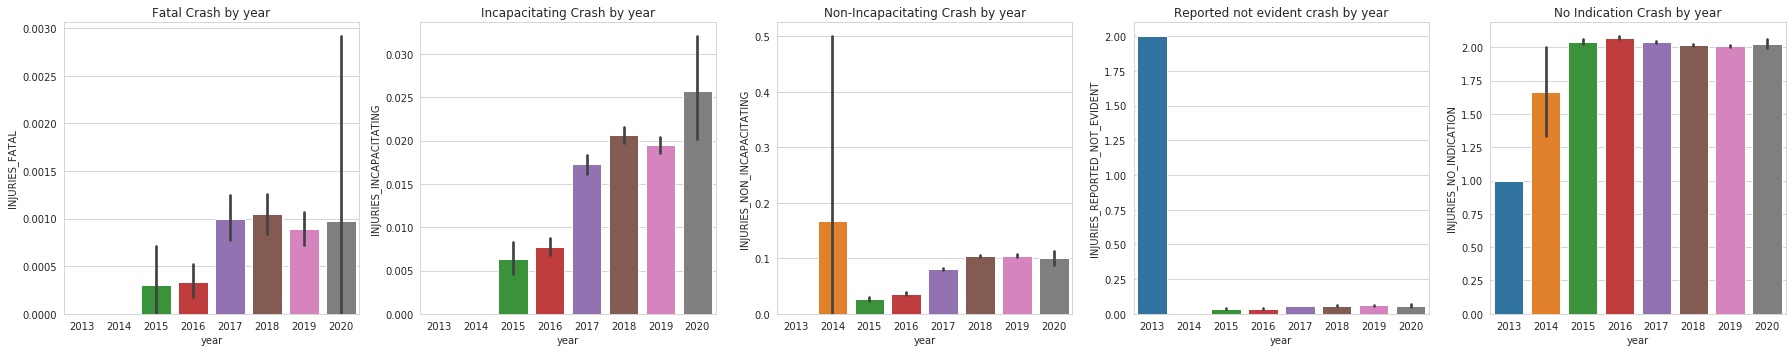

In [20]:
df['year']=df.index.to_series().dt.year

fig, ax = plt.subplots(1, 5, figsize = (25, 5));

sns.barplot(x="year",y="INJURIES_FATAL",  data=df, ax=ax[0]);
sns.barplot(x="year", y="INJURIES_INCAPACITATING",  data=df, ax=ax[1]);
sns.barplot(x="year", y="INJURIES_NON_INCAPACITATING",  data=df, ax=ax[2]);
sns.barplot(x="year", y="INJURIES_REPORTED_NOT_EVIDENT",  data=df, ax=ax[3]);
sns.barplot(x="year", y="INJURIES_NO_INDICATION",  data=df, ax=ax[4]);
[ax[i].set_xlabel('year') for i in range(5)]
plt.tight_layout()
ax[0].set_title('Fatal Crash by year')
ax[1].set_title('Incapacitating Crash by year')
ax[2].set_title('Non-Incapacitating Crash by year')
ax[3].set_title('Reported not evident crash by year')
ax[4].set_title('No Indication Crash by year')
plt.tight_layout()
plt.show()

#### Traffic crash types by the year( Line charts)

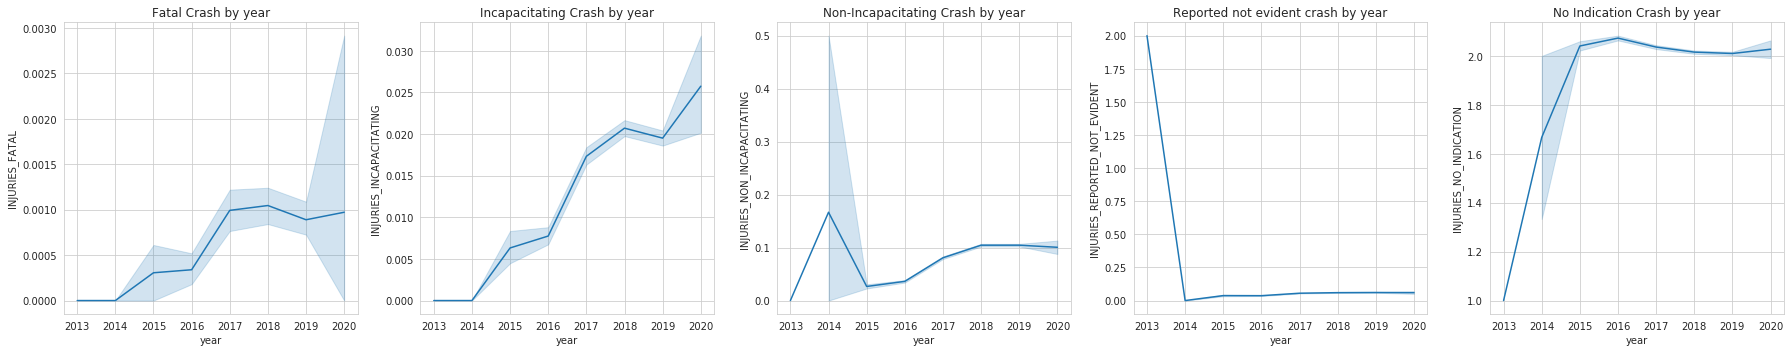

In [21]:
fig, ax = plt.subplots(1, 5, figsize = (25, 5));

sns.lineplot(x="year",y="INJURIES_FATAL",  data=df, ax=ax[0]);
sns.lineplot(x="year", y="INJURIES_INCAPACITATING",  data=df, ax=ax[1]);
sns.lineplot(x="year", y="INJURIES_NON_INCAPACITATING",  data=df, ax=ax[2]);
sns.lineplot(x="year", y="INJURIES_REPORTED_NOT_EVIDENT",  data=df, ax=ax[3]);
sns.lineplot(x="year", y="INJURIES_NO_INDICATION",  data=df, ax=ax[4]);
[ax[i].set_xlabel('year') for i in range(5)]
ax[0].set_title('Fatal Crash by year')
ax[1].set_title('Incapacitating Crash by year')
ax[2].set_title('Non-Incapacitating Crash by year')
ax[3].set_title('Reported not evident crash by year')
ax[4].set_title('No Indication Crash by year')
plt.tight_layout()
plt.show()

#### Traffic crash types by the Month( Bar charts)


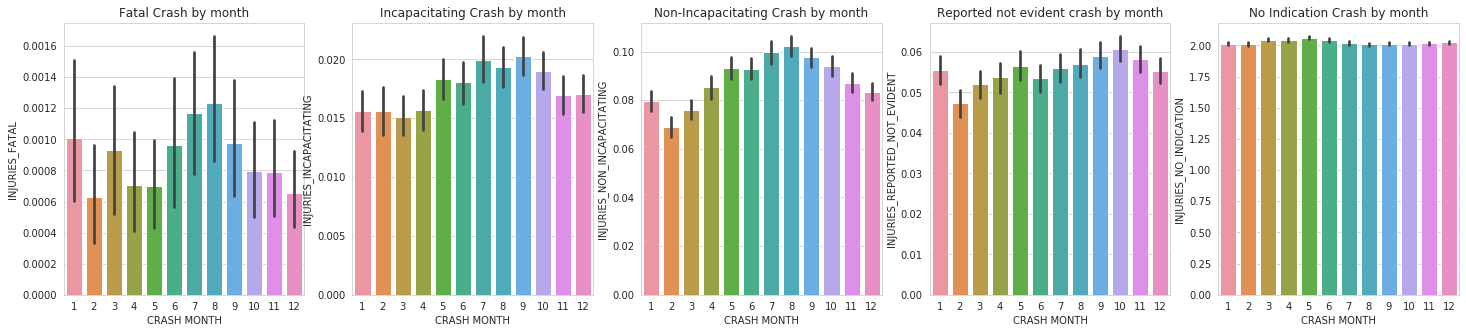

<Figure size 432x288 with 0 Axes>

In [22]:
fig, ax = plt.subplots(1, 5, figsize = (25, 5));

sns.barplot(x="CRASH_MONTH",y="INJURIES_FATAL",  data=df, ax=ax[0]);
sns.barplot(x="CRASH_MONTH", y="INJURIES_INCAPACITATING",  data=df, ax=ax[1]);
sns.barplot(x="CRASH_MONTH", y="INJURIES_NON_INCAPACITATING",  data=df, ax=ax[2]);
sns.barplot(x="CRASH_MONTH", y="INJURIES_REPORTED_NOT_EVIDENT",  data=df, ax=ax[3]);
sns.barplot(x="CRASH_MONTH", y="INJURIES_NO_INDICATION",  data=df, ax=ax[4]);
[ax[i].set_xlabel('CRASH MONTH') for i in range(5)]
ax[0].set_title('Fatal Crash by month')
ax[1].set_title('Incapacitating Crash by month')
ax[2].set_title('Non-Incapacitating Crash by month')
ax[3].set_title('Reported not evident crash by month')
ax[4].set_title('No Indication Crash by month')

plt.show()
plt.tight_layout()

#### Traffic crash types by road type and condition

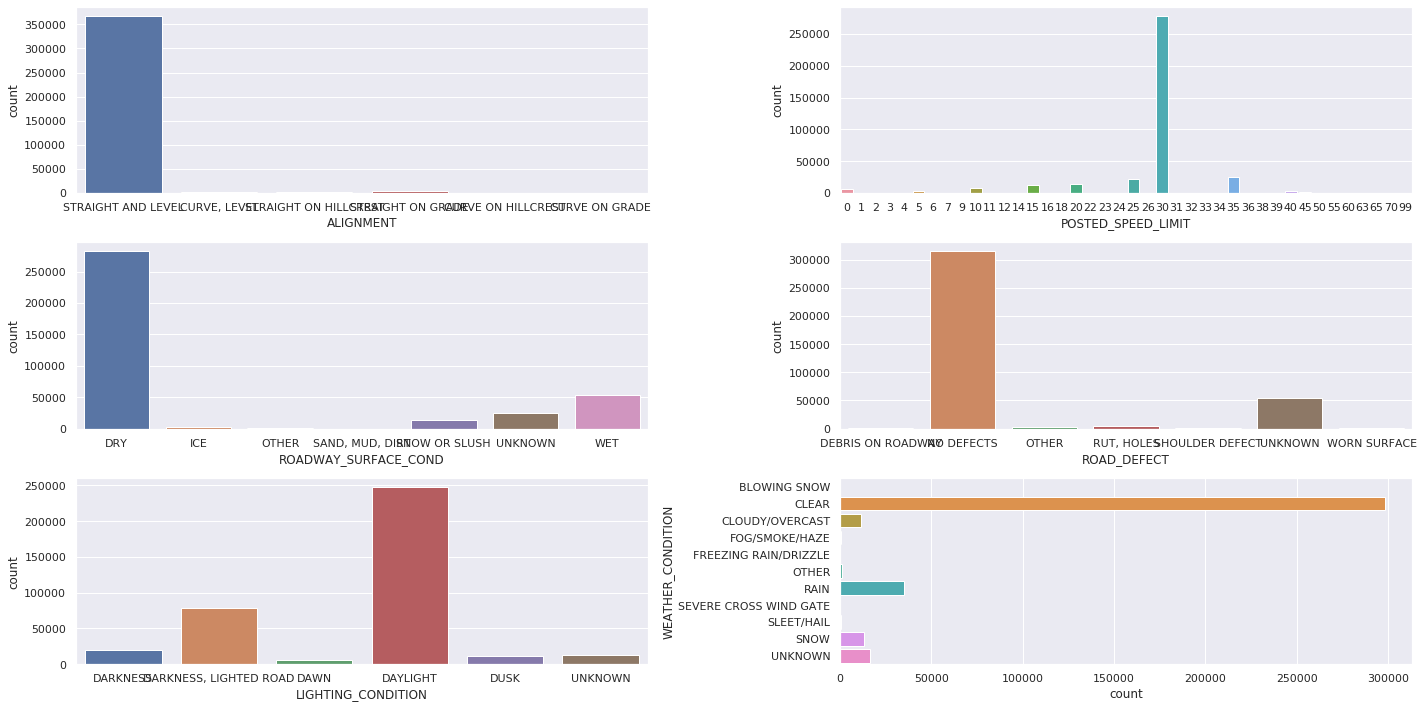

In [23]:
sns.set(font_scale=1) 
fig, ax = plt.subplots(3, 2, figsize = (20, 10));

sns.countplot(x='ALIGNMENT',data=df, ax=ax[0,0]);
sns.countplot(x='POSTED_SPEED_LIMIT',data=df, ax=ax[0,1])
sns.countplot(x='ROADWAY_SURFACE_COND',data=df, ax=ax[1,0])
sns.countplot(x='ROAD_DEFECT',data=df, ax=ax[1,1])
sns.countplot(x='LIGHTING_CONDITION',data=df, ax=ax[2,0])
sns.countplot(y='WEATHER_CONDITION',data=df, ax=ax[2,1])
#[ax[i].set_xlabel('CRASH MONTH') for i in range(5)]
#ax[0].set_title('Road Alignment')
plt.tight_layout()
plt.show()

#### Traffic crash types by trafic Control 

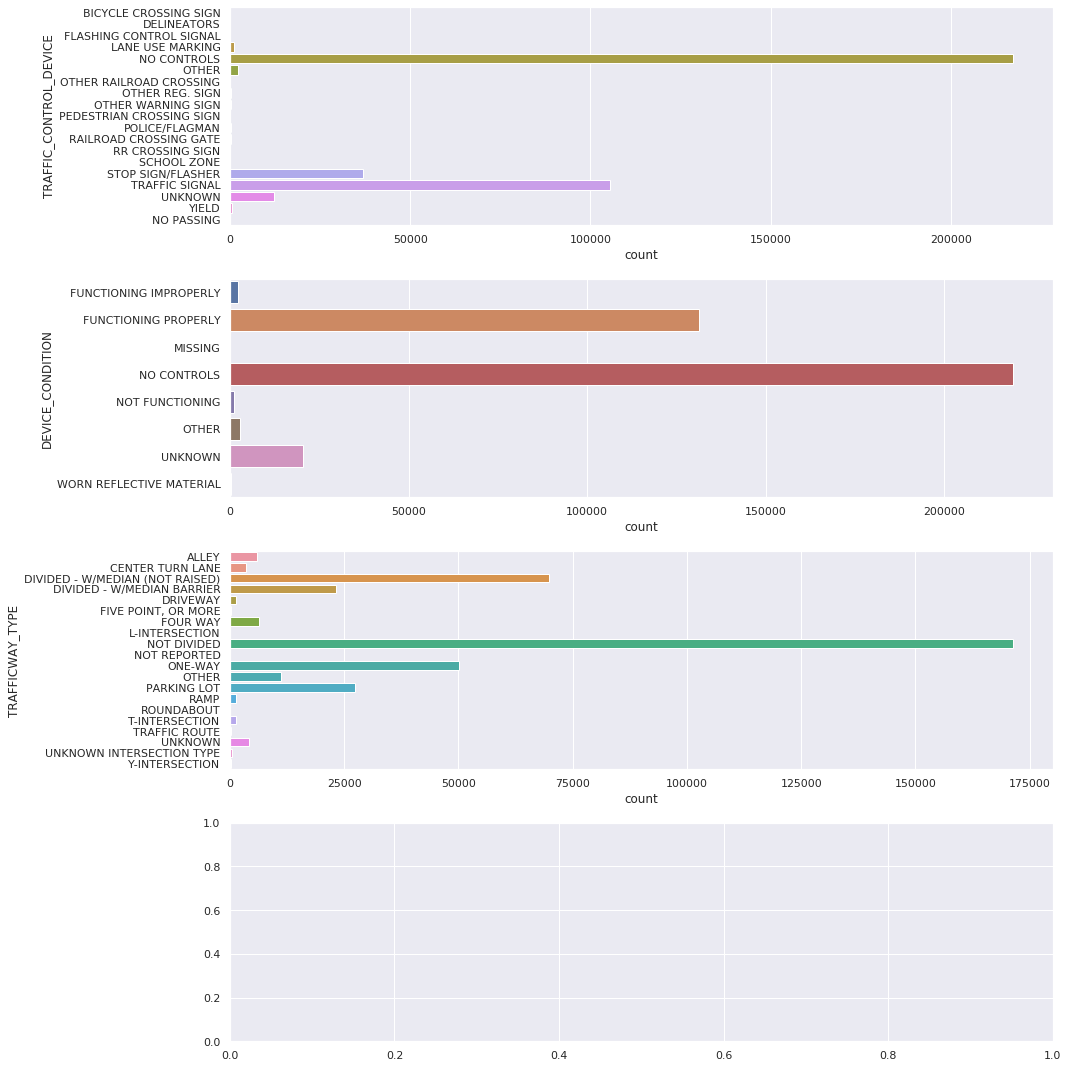

In [24]:
sns.set(font_scale=1) 
fig, ax = plt.subplots(4, figsize = (15, 15));

sns.countplot(y='TRAFFIC_CONTROL_DEVICE',data=df, ax=ax[0]);
sns.countplot(y='DEVICE_CONDITION',data=df, ax=ax[1])
sns.countplot(y='TRAFFICWAY_TYPE',data=df, ax=ax[2])
#sns.countplot(y='LANE_CNT',data=df, ax=ax[3])

plt.tight_layout()

## Visualizing Fatal Crashes and the most related variables

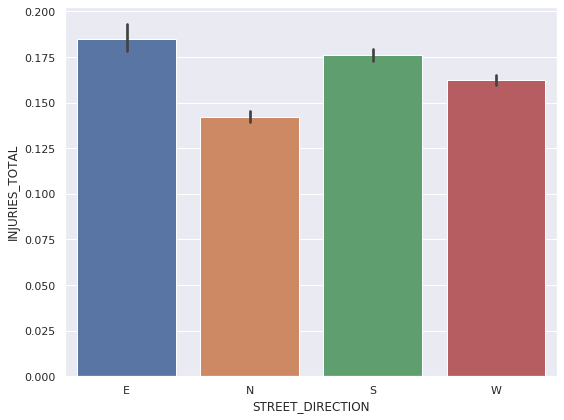

In [25]:
plt.figure(figsize=(8,6))
sns.barplot(x="STREET_DIRECTION", y="INJURIES_TOTAL",  data=df);
plt.tight_layout()

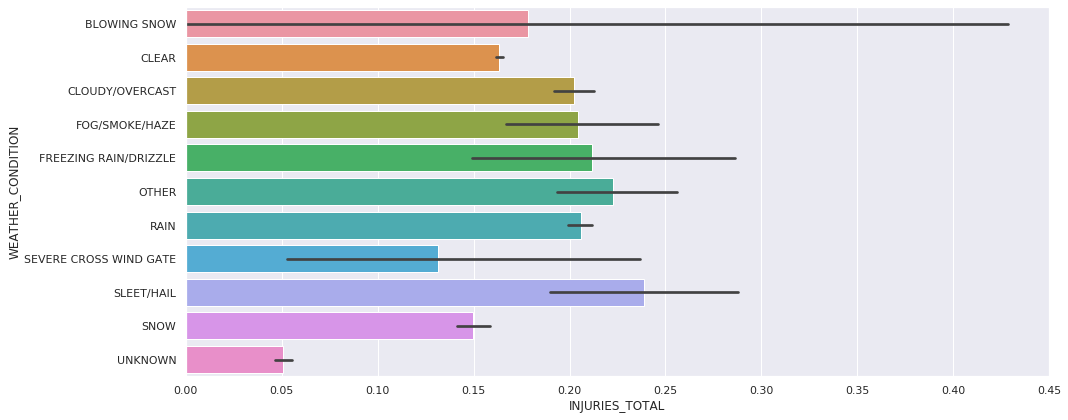

In [26]:
plt.figure(figsize=(15,6))
sns.barplot(y="WEATHER_CONDITION", x="INJURIES_TOTAL",  data=df);
plt.tight_layout()

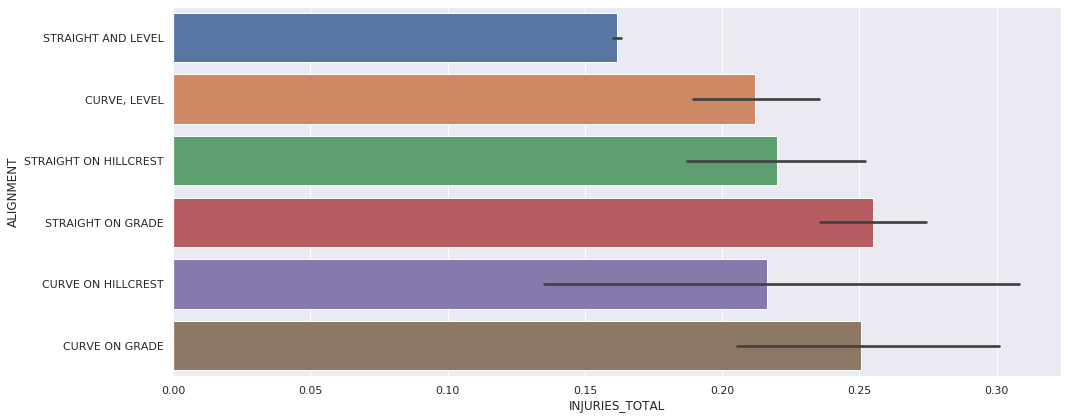

In [27]:
plt.figure(figsize=(15,6))
sns.barplot(y="ALIGNMENT", x="INJURIES_TOTAL",  data=df);
plt.tight_layout()

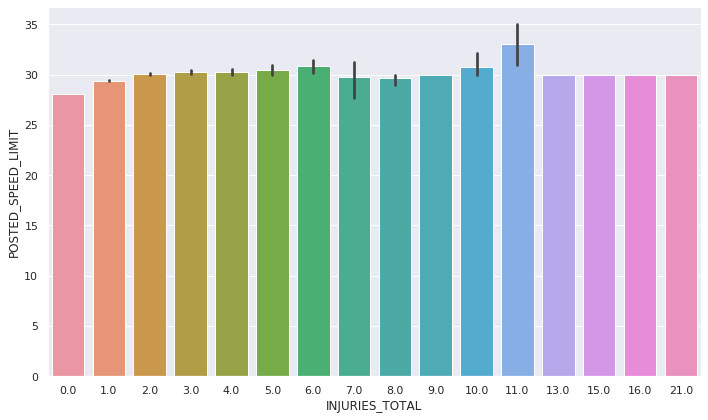

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(x="INJURIES_TOTAL", y="POSTED_SPEED_LIMIT",  data=df);
plt.tight_layout()
del df['year']

### Dropping INSIGNIFICANT  columns or Columns that Make Fitting take too long

In [29]:
# dropping INSIGNIFICANT  columns 
df2 =df.drop(["CRASH_DATE_EST_I", "INTERSECTION_RELATED_I", "NOT_RIGHT_OF_WAY_I","HIT_AND_RUN_I","PHOTOS_TAKEN_I","STATEMENTS_TAKEN_I","DOORING_I", "WORK_ZONE_I","WORK_ZONE_TYPE","WORKERS_PRESENT_I","INJURIES_UNKNOWN", "BEAT_OF_OCCURRENCE",
              "STREET_NAME", 'STREET_NO', 'RD_NO','DATE_POLICE_NOTIFIED','LATITUDE','LONGITUDE','FIRST_CRASH_TYPE','TRAFFIC_CONTROL_DEVICE','DEVICE_CONDITION',
              'LIGHTING_CONDITION','LANE_CNT','ALIGNMENT','ROADWAY_SURFACE_COND','ROAD_DEFECT','REPORT_TYPE','DAMAGE','SEC_CONTRIBUTORY_CAUSE','MOST_SEVERE_INJURY','LOCATION','TRAFFICWAY_TYPE','STREET_DIRECTION','STREET_NAME'], axis = 1) 


In [30]:
# Create Target Variable
def are_there_injuries(total_injuries):
    if (total_injuries != np.nan):
        return 1 if total_injuries > 0 else 0
    else:
        return np.nan

df2['injuries'] = df2['INJURIES_TOTAL'].apply(lambda x: are_there_injuries(x))

In [31]:
df2.head()


,POSTED_SPEED_LIMIT,WEATHER_CONDITION,CRASH_TYPE,PRIM_CONTRIBUTORY_CAUSE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,injuries
CRASH_DATE,,,,,,,,,,,,,,,
2013-03-03 16:48:00,30,CLEAR,INJURY AND / OR TOW DUE TO CRASH,IMPROPER LANE USAGE,2.0,2.0,0.0,0.0,0.0,2.0,1.0,16,1,3,1
2014-01-18 18:14:00,30,CLEAR,NO INJURY / DRIVE AWAY,UNABLE TO DETERMINE,2.0,0.0,0.0,0.0,0.0,0.0,2.0,18,7,1,0
2014-01-21 07:40:00,30,CLEAR,INJURY AND / OR TOW DUE TO CRASH,FAILING TO YIELD RIGHT-OF-WAY,2.0,1.0,0.0,0.0,1.0,0.0,1.0,7,3,1,1
2014-02-24 19:45:00,30,RAIN,NO INJURY / DRIVE AWAY,UNABLE TO DETERMINE,2.0,0.0,0.0,0.0,0.0,0.0,2.0,19,2,2,0
2014-06-25 19:00:00,30,RAIN,NO INJURY / DRIVE AWAY,IMPROPER OVERTAKING/PASSING,2.0,0.0,0.0,0.0,0.0,0.0,2.0,19,4,6,0


### Logistic Regression Model
Below we will use the LRM to predict the low price. We also utilize the ShuffleSplit function in order to randomly sample our entire dataset during each iteration to generate a training set and a test set.

In [32]:
#Logistic Model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.model_selection import ShuffleSplit


#### Below is an example using the ShuffleSplit by using 3 iterations to generate the training/test set

In [33]:
#create the split
df3 = df2.drop(['INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_NO_INDICATION', 'INJURIES_INCAPACITATING',
                'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT'], axis=1)
injuries = df3[['injuries']]
nums = df3.select_dtypes(['float64', 'int64']).drop(['injuries'], axis=1)
onehotencoded = pd.get_dummies(df3.select_dtypes('category'))

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

scaled_nums = pd.DataFrame(ss.fit_transform(nums), index=nums.index, columns=nums.columns)
scaled_onehotencoded = pd.DataFrame(ss.fit_transform(onehotencoded), index = onehotencoded.index, columns=onehotencoded.columns)
final_set = pd.concat([injuries, scaled_nums, scaled_onehotencoded], axis=1)
final_set = final_set.dropna()



                         


In [35]:
final_set

,injuries,POSTED_SPEED_LIMIT,NUM_UNITS,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,WEATHER_CONDITION_BLOWING SNOW,WEATHER_CONDITION_CLEAR,WEATHER_CONDITION_CLOUDY/OVERCAST,WEATHER_CONDITION_FOG/SMOKE/HAZE,WEATHER_CONDITION_FREEZING RAIN/DRIZZLE,WEATHER_CONDITION_OTHER,WEATHER_CONDITION_RAIN,WEATHER_CONDITION_SEVERE CROSS WIND GATE,WEATHER_CONDITION_SLEET/HAIL,WEATHER_CONDITION_SNOW,WEATHER_CONDITION_UNKNOWN,CRASH_TYPE_INJURY AND / OR TOW DUE TO CRASH,CRASH_TYPE_NO INJURY / DRIVE AWAY,PRIM_CONTRIBUTORY_CAUSE_ANIMAL,PRIM_CONTRIBUTORY_CAUSE_BICYCLE ADVANCING LEGALLY ON RED LIGHT,PRIM_CONTRIBUTORY_CAUSE_CELL PHONE USE OTHER THAN TEXTING,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING OTHER TRAFFIC SIGNS,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING ROAD MARKINGS,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING STOP SIGN,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING TRAFFIC SIGNALS,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING YIELD SIGN,PRIM_CONTRIBUTORY_CAUSE_DISTRACTION - FROM INSIDE VEHICLE,PRIM_CONTRIBUTORY_CAUSE_DISTRACTION - FROM OUTSIDE VEHICLE,"PRIM_CONTRIBUTORY_CAUSE_DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)",PRIM_CONTRIBUTORY_CAUSE_DRIVING ON WRONG SIDE/WRONG WAY,PRIM_CONTRIBUTORY_CAUSE_DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,PRIM_CONTRIBUTORY_CAUSE_EQUIPMENT - VEHICLE CONDITION,"PRIM_CONTRIBUTORY_CAUSE_EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST",PRIM_CONTRIBUTORY_CAUSE_FAILING TO REDUCE SPEED TO AVOID CRASH,PRIM_CONTRIBUTORY_CAUSE_FAILING TO YIELD RIGHT-OF-WAY,PRIM_CONTRIBUTORY_CAUSE_FOLLOWING TOO CLOSELY,PRIM_CONTRIBUTORY_CAUSE_HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE),PRIM_CONTRIBUTORY_CAUSE_IMPROPER BACKING,PRIM_CONTRIBUTORY_CAUSE_IMPROPER LANE USAGE,PRIM_CONTRIBUTORY_CAUSE_IMPROPER OVERTAKING/PASSING,PRIM_CONTRIBUTORY_CAUSE_IMPROPER TURNING/NO SIGNAL,PRIM_CONTRIBUTORY_CAUSE_MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT,PRIM_CONTRIBUTORY_CAUSE_NOT APPLICABLE,PRIM_CONTRIBUTORY_CAUSE_OBSTRUCTED CROSSWALKS,"PRIM_CONTRIBUTORY_CAUSE_OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER",PRIM_CONTRIBUTORY_CAUSE_PASSING STOPPED SCHOOL BUS,PRIM_CONTRIBUTORY_CAUSE_PHYSICAL CONDITION OF DRIVER,PRIM_CONTRIBUTORY_CAUSE_RELATED TO BUS STOP,PRIM_CONTRIBUTORY_CAUSE_ROAD CONSTRUCTION/MAINTENANCE,PRIM_CONTRIBUTORY_CAUSE_ROAD ENGINEERING/SURFACE/MARKING DEFECTS,PRIM_CONTRIBUTORY_CAUSE_TEXTING,PRIM_CONTRIBUTORY_CAUSE_TURNING RIGHT ON RED,PRIM_CONTRIBUTORY_CAUSE_UNABLE TO DETERMINE,PRIM_CONTRIBUTORY_CAUSE_UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED),"PRIM_CONTRIBUTORY_CAUSE_VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)",PRIM_CONTRIBUTORY_CAUSE_WEATHER,PRIM_CONTRIBUTORY_CAUSE_EXCEEDING AUTHORIZED SPEED LIMIT,PRIM_CONTRIBUTORY_CAUSE_EXCEEDING SAFE SPEED FOR CONDITIONS
CRASH_DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-03-03 16:48:00,1,0.263442,-0.04972,0.516941,-1.587572,-1.131503,-0.008764,0.515484,-0.178005,-0.043707,-0.025583,-0.057001,-0.320280,-0.014916,-0.040421,-0.191361,-0.212319,1.836834,-1.836834,-0.02894,-0.012606,-0.037454,-0.044966,-0.038052,-0.102905,-0.128806,-0.018911,-0.085492,-0.066044,-0.021594,-0.065699,-0.179472,-0.076287,-0.042348,-0.206490,-0.355641,-0.354435,-0.032807,-0.218298,4.859933,-0.226378,-0.187673,-0.00671,-0.239402,-0.007278,-0.108702,-0.011959,-0.074745,-0.014465,-0.052042,-0.056461,-0.021284,-0.025635,-0.752468,-0.070564,-0.07648,-0.128604,-0.072453,-0.066888
2014-01-18 18:14:00,0,0.263442,-0.04972,0.883573,1.464318,-1.710393,-0.008764,0.515484,-0.178005,-0.043707,-0.025583,-0.057001,-0.320280,-0.014916,-0.040421,-0.191361,-0.212319,-0.544415,0.544415,-0.02894,-0.012606,-0.037454,-0.044966,-0.038052,-0.102905,-0.128806,-0.018911,-0.085492,-0.066044,-0.021594,-0.065699,-0.179472,-0.076287,-0.042348,-0.206490,-0.355641,-0.354435,-0.032807,-0.218298,-0.205764,-0.226378,-0.187673,-0.00671,-0.239402,-0.007278,-0.108702,-0.011959,-0.074745,-0.014465,-0.052042,-0.056461,-0.021284,-0.025635,1.328960,-0.070564,-0.07648,-0.128604,-0.072453,-0.06688

In [34]:
import time
import matplotlib.pyplot as plt
from multiprocessing import cpu_count
from src.tuning import clfHyperFit, logUniform
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

cores = cpu_count() - 1
grid = logUniform(0.01,5).rvs(size=15)

filt = final_set.index < '2019-12-01 00:00:00'
validation_part = final_set[filt]
filt2 = final_set.index >= '2019-12-01 00:00:00'
test_parts = final_set[filt2]

y = validation_part['injuries']
X = validation_part.drop(['injuries'], axis=1)

tss = TimeSeriesSplit(n_splits = 5)
classifier = LogisticRegression(max_iter=1000)
gs = GridSearchCV(classifier, param_grid = {'C':grid}, cv = tss, scoring = 'neg_log_loss', n_jobs=cores)
start=time.time()
gs.fit(X, y.astype(int))
end=time.time()

end-start

26.93908166885376

In [36]:
best_logistic = gs.best_estimator_

In [37]:
X_test = test_parts.drop(['injuries'],axis=1)
y_test = test_parts['injuries']
pred = best_logistic.predict(X_test)

In [38]:
from sklearn.metrics import classification_report
from pprint import pprint
pprint(classification_report(y_test, pred))

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.96      0.89      0.93     11674\n'
 '           1       0.51      0.74      0.60      1738\n'
 '\n'
 '    accuracy                           0.87     13412\n'
 '   macro avg       0.73      0.82      0.76     13412\n'
 'weighted avg       0.90      0.87      0.88     13412\n')


In [39]:
coeffs = dict()
for i in range(len(best_logistic.coef_[0])):
    coeffs.update({X_test.columns[i]:best_logistic.coef_[0][i]})
coef_df = pd.DataFrame(coeffs, index=coeffs.keys())
series = pd.Series(np.diag(coef_df), index=[coef_df.index])
series.sort_values()


CRASH_TYPE_NO INJURY / DRIVE AWAY                                                                          -1.910197
PRIM_CONTRIBUTORY_CAUSE_IMPROPER LANE USAGE                                                                -0.093281
PRIM_CONTRIBUTORY_CAUSE_ROAD ENGINEERING/SURFACE/MARKING DEFECTS                                           -0.087697
PRIM_CONTRIBUTORY_CAUSE_EQUIPMENT - VEHICLE CONDITION                                                      -0.073925
PRIM_CONTRIBUTORY_CAUSE_DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                -0.061172
PRIM_CONTRIBUTORY_CAUSE_IMPROPER TURNING/NO SIGNAL                                                         -0.049540
PRIM_CONTRIBUTORY_CAUSE_UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)                 -0.046614
WEATHER_CONDITION_UNKNOWN                                                                                  -0.043922
WEATHER_CONDITION_SNOW                                          

The top 5 predictors for whether there is an injury in a given accident are exceeding safe speed for conditions, the posted speed limit at the time of the accident, exceeding the authorized speed of the accident, the weather conditions, and the number of units involved in the accident. The coefficients for the second and fifth predictor are strangely negative. The model seems to interpret these as, all else in the model being equal, variables that have a negative association with whether there is an injury in a given car crash. In short, if the model learns that an accident happened in an area with a high speed limit and the numerous cars or people were involved, it is LESS likely to believe that someone was injured in it. That the weather and the speeding increases the odds of there being an injury is fairly intuitive. What we might be seeing is another case of humans misjudging the risk of low speed areas or it might be that areas with lower speeds may in fact have speeds that are too high. The areas with lower speeds likely have lower speeds for a reason, so perhaps those speeds were assigned by convention rather than by thoughtful design. I would suggest that a stakeholder speak with a traffic engineer to see if traffic speeds can be further optimized for safety.

## Support Vector Machine Model

In [45]:
#Don't have resources on hand to tune like we did above. 
#SVM
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix


classifier = SVC(max_iter=4000, probability=True)
classifier.fit(X,y.astype(int))

/home/kevin/miniconda3/envs/chicagoenv/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=4000, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [46]:
pred = classifier.predict(X_test)

In [47]:
from sklearn.metrics import classification_report
from pprint import pprint
pprint(classification_report(y_test, pred))
# Model did strangely well given that it was untuned and failed to converge. 

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.92      0.59      0.72     11674\n'
 '           1       0.20      0.68      0.31      1738\n'
 '\n'
 '    accuracy                           0.60     13412\n'
 '   macro avg       0.56      0.63      0.51     13412\n'
 'weighted avg       0.83      0.60      0.67     13412\n')


In [48]:
vec = dict()
for i in range(len(classifier.support_vectors_[0])):
    vec.update({X_test.columns[i]:classifier.support_vectors_[0][i]})
vec_df = pd.DataFrame(vec, index=vec.keys())
series = pd.Series(np.diag(vec_df), index=[vec_df.index])
series.sort_values()



CRASH_TYPE_NO INJURY / DRIVE AWAY                                                                          -1.836834
PRIM_CONTRIBUTORY_CAUSE_FAILING TO YIELD RIGHT-OF-WAY                                                      -0.355641
PRIM_CONTRIBUTORY_CAUSE_FOLLOWING TOO CLOSELY                                                              -0.354435
WEATHER_CONDITION_RAIN                                                                                     -0.320280
PRIM_CONTRIBUTORY_CAUSE_NOT APPLICABLE                                                                     -0.239402
PRIM_CONTRIBUTORY_CAUSE_IMPROPER OVERTAKING/PASSING                                                        -0.226378
PRIM_CONTRIBUTORY_CAUSE_IMPROPER BACKING                                                                   -0.218298
WEATHER_CONDITION_UNKNOWN                                                                                  -0.212319
PRIM_CONTRIBUTORY_CAUSE_FAILING TO REDUCE SPEED TO AVOID CRASH  

Above we see only the first support vector (including the others would pollute the screen). Most of the the support vectors tell us a similar story, but it might not be wise to take it at face value since the algorithm did not converge. Still, the most influential vectors consistently had strong values for Drive Away Crash types, Crashes that require towing, weather, and so forth.

### Model Advantages

We are unable to objectively assess the predictive performance of the SVM algorithm for this use case given that we did not have the computational resources to perform either a grid or randomized search cv; however, the results of the logistic regression model were quite good for a model that fit in roughly half a minute. The SVM would take ages to fit just once, so we can't see fitting an SVC as something worth doing for this use case even if we could tune it. Even if it didn't take forever to fit, we couldn't even get the SVC algorithm simply would not converge (even at 4000 iterations).   